In [5]:
from abc import ABC, abstractmethod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Cell(ABC):

    @abstractmethod
    def get_reward() -> float:
        pass

In [3]:
class RegularCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward() -> float:
        return self.reward


class TerminalCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward() -> float:
        return self.reward


class WallCell(Cell):

    def get_reward() -> float:
        return 0

In [ ]:
class Board:

    @staticmethod
    def process_cells(cells: list[list[Cell]]):
        if not cells:
            raise Exception("Number of rows in a board must be at least one.")
        if not cells[0]:
            raise Exception(
                "Each row in a a board must have the same number of columns. "
                "There has to be at least one column.")
        rows_no = len(cells)
        cols_no = len(cells[0])
        for row in cells:
            if not row or len(row) != cols_no:
                raise Exception(
                    "Each row in a a board must have the same number of columns. "
                    "There has to be at least one column.")
        return rows_no, cols_no

    @staticmethod
    def process_pos(pos, rows_no, cols_no):
        r, c = pos
        if r < 0 or r >= rows_no:
            raise Exception("Invalid row position.")
        if c < 0 or c >= cols_no:
            raise Exception("Invalid column position.")
        # proverity da li se nalazimo na zidu!!!
        return r, c
    
    def __init__(cells: list[list[Cell]], pos: tuple[int, int]):
        rows_no, cols_no = Board.process_cells(cells)
        self.cells = cells
        self.rows_no = rows_no
        self.cols_no = cols_no
        r, c = Board.process_pos(pos, rows_no, cols_no)
        self.row = r
        self.col = c

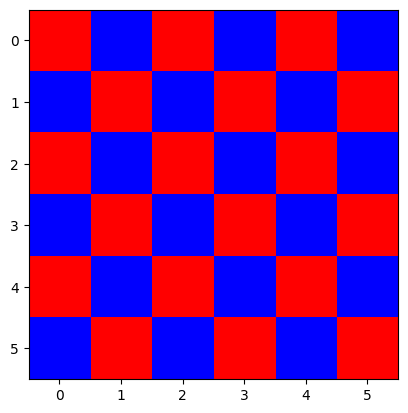

In [8]:
board = np.ones(shape=(6, 6, 3), dtype=np.uint8)
for i in range(6):
    for j in range(6):
        if (i+j) % 2 == 0:
            board[i, j, :] = [255, 0, 0]
        else:
            board[i, j, :] = [0, 0, 255]

plt.imshow(board)